In [1]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
#

# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
# from sklearn.metrics import accuracy_score, precision_recall_curve, plot_roc_curve, plot_confusion_matrix
# from sklearn.metrics import SCORERS, plot_precision_recall_curve
from sklearn.metrics import *
from sklearn.utils import parallel_backend
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

from matplotlib import pyplot as plt
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"

# Constants
SEED = 87654

/Users/zane/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = joblib.load('../models/fitted-nnet-activation-logistic.joblib')
# model

In [3]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['tenth_day_credits',
                                                   'num_courses', 'pts',
                                                   'attmp', 'nongrd', 'qgpa',
                                                   'tot_creds', 'cum.pts',
                                                   'cum.attmp', 'cum.gpa',
                                                   'age', 'trans_gpa',
                                                   'high_sch_gpa',
                                                   'major.change.count'

In [9]:
# model.score?

In [4]:
new_data = pd.read_csv('../data/ALL-STU-new-data-to-predict.csv',
                       na_values=['NA', 'NaN', 'Inf', '-Inf'])

####
# Don't use these
id_vars = ['system_key', 'yrq', 'tran_major_abbr']
target = 'Y'
####

# new_data = recode_cats(new_data, cat_var_list)
new_x_vars = [x for x in new_data.columns if x not in [target]]
new_x_vars = [x for x in new_x_vars if x not in id_vars]
new_x = new_data[new_x_vars]
# missing_vars = [x for x in x_vars if x not in new_x_vars]
# missing_vars = dict((x, np.nan) for x in missing_vars)
new_data['yrq'].value_counts()

20231    54355
Name: yrq, dtype: int64

In [5]:
# new_preds = model.predict(new_x)
new_predsa = model.predict_proba(new_x)

In [6]:
print(new_predsa.shape)
print(new_data.shape)

(54355, 2)
(54355, 91)


In [7]:
print(new_predsa[0:10, ])

[[0.95706334 0.04293666]
 [0.21547724 0.78452276]
 [0.93286809 0.06713191]
 [0.99648954 0.00351046]
 [0.99357155 0.00642845]
 [0.98873473 0.01126527]
 [0.38098272 0.61901728]
 [0.99265704 0.00734296]
 [0.95609868 0.04390132]
 [0.99801391 0.00198609]]


(array([12233.,  5640.,  7419.,  8642.,  7137.,  5247.,  3737.,  2455.,
         1364.,   481.]),
 array([4.93672234e-04, 1.00389240e-01, 2.00284807e-01, 3.00180374e-01,
        4.00075942e-01, 4.99971509e-01, 5.99867076e-01, 6.99762643e-01,
        7.99658211e-01, 8.99553778e-01, 9.99449345e-01]),
 <BarContainer object of 10 artists>)

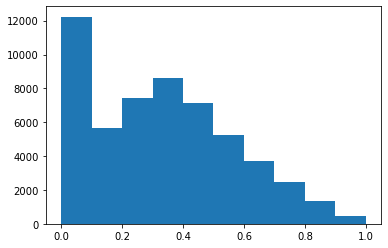

In [8]:
# prob of `1`
plt.hist(new_predsa[:, 1])

In [9]:
# new_data[id_vars]
df = new_data[id_vars]
df = df.assign(pred0=new_predsa[:, 0],
               pred1=new_predsa[:, 1])

df.head()

,system_key,yrq,tran_major_abbr,pred0,pred1
0,13066,20231,T NURS,0.957063,0.042937
1,14310,20231,NURS,0.215477,0.784523
2,18235,20231,ANTH,0.932868,0.067132
3,24095,20231,ENGL,0.996490,0.003510
4,25807,20231,ISS O,0.993572,0.006428


In [ ]:
# TODO: create a dict to generate the 'correct' file name - `yyyy-quartername-pred-proba.csv

In [10]:
outpath = '../data-preds/'
fname = 'pred-proba-' + str(df['yrq'][0]) + '.csv'
df.to_csv(outpath + fname, index=False)
print('writing preds to:', outpath + fname)

writing preds to: ../data-preds/pred-proba-20231.csv


In [11]:
# # split ENG majors
# eng_abbvs = ['A A',
#              'BIOEN',
#              'BSE',
#              'C SCI',
#              'CHEM E',
#              'CIV E',
#              'CMP E',
#              'E E',
#              'ENGRUD',
#              'ENV E',
#              'HCDE',
#              'IND E',
#              'INT EN',
#              'M E',
#              'MS E',
#              'PREBSE',
#              'STARS']
# eng = df[df['tran_major_abbr'].isin(eng_abbvs)]

In [12]:
# eng.shape
# # transform
# # np.interp(eng['prob1'], eng['prob1'].min(), eng['prob1'].max(), (-5, 5))
# from sklearn.preprocessing import minmax_scale

(1981, 5)

,system_key,yrq,tran_major_abbr,proba
85,398775,20223,E E,-0.68
106,503745,20223,M E,-4.59
165,684523,20223,CIV E,-4.51
210,759307,20223,M E,-4.94
240,799511,20223,M E,-4.76


(array([1629.,  118.,   50.,   45.,   37.,   25.,   23.,   15.,   11.,
          28.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

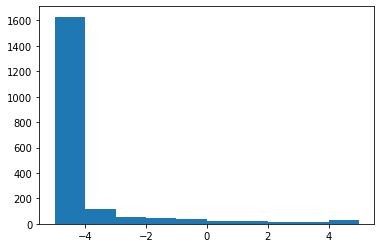

In [13]:
# proba = minmax_scale(eng['pred1'], feature_range=(-5, 5))

# eng_out = eng[id_vars]
# eng_out = eng_out.assign(proba = proba)
# eng_out['proba'] = round(eng_out['proba'], 2)
# eng_out.head()
# plt.hist(eng_out['proba'])

In [14]:
# eng_out.to_csv(outpath + 'pred-probs-eng-' + str(df['yrq'][0]) + '.csv', index=False)

In [15]:
# # write out the regular data w/o the tran_major_abbv
# df = df.drop(columns=['tran_major_abbr'])
# df.head()
# df.to_csv(outpath + fname, index=False)

,system_key,yrq,pred0,pred1
0,527,20223,0.978177,0.021823
1,4912,20223,0.975441,0.024559
2,7489,20223,0.885759,0.114241
3,12410,20223,0.842169,0.157831
4,13066,20223,0.690459,0.309541
